In [1]:
import sys  
sys.path.insert(0, '../../')
import h5py
import matplotlib.pyplot as plt
from cloudseg.datasets.preprocessing import apply_clear_sky, process_irccam_img
import numpy as np
%matplotlib inline

In [3]:
file_name = '../../irccam_20180112_rad_pred.mat'
with h5py.File(file_name, 'r') as f:
    print(f['preds'])

<HDF5 dataset "preds": shape (10, 640, 640), type "<f4">


In [4]:
file_name = '../../data/raw/davos/irccam/irccam_20180112_rad.mat'
with h5py.File(file_name, 'r') as f:
    print(f.keys())

<KeysViewHDF5 ['#refs#', 'AZ', 'BT', 'CLOUDS', 'CameraToffset', 'TB', 'TM', 'ZA', 'alphadata', 'calibdata', 'cloudfrac', 'img', 'mask', 'meteo', 'tair', 'thor']>


In [53]:
file_name = '../../data/raw/davos/irccam/irccam_20180112_rad.mat'
with h5py.File(file_name, 'r') as f:
    print(f['mask'].shape)

(640, 640)


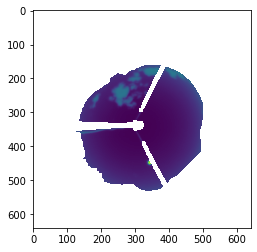

In [104]:
file_name = '../../data/raw/davos/irccam/irccam_20180525_rad.mat'
with h5py.File(file_name, 'r') as f:
    img = f['BT'][50]
    plt.imshow(img)

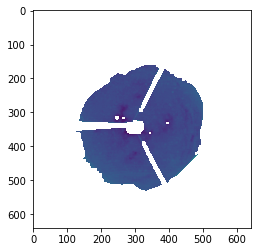

In [31]:
file_name = '../../data/raw/davos/irccam/irccam_20180112_rad.mat'
with h5py.File(file_name, 'r') as f:
    img = f['CLOUDS'][60]
    plt.imshow(img)

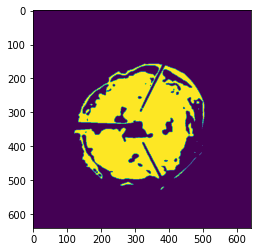

In [30]:
file_name = '../../irccam_20180112_rad_pred.mat'
with h5py.File(file_name, 'r') as f:
    img = f['preds'][60]
    plt.imshow(img)

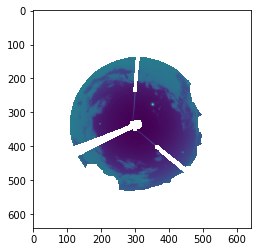

In [73]:
file_name = '../../data/raw/geneva/irccam/irccam_20200621_rad.mat'
idx = 800
with h5py.File(file_name, 'r') as f:
    img = f['BT'][idx]
    plt.imshow(img)

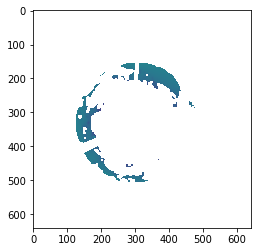

In [74]:
with h5py.File(file_name, 'r') as f:
    img = f['CLOUDS'][idx]
    plt.imshow(img)

In [84]:
example_file = '../../example_input.mat'
with h5py.File(example_file, 'r') as f:
    print(f.keys())

<KeysViewHDF5 ['#refs#', 'AZ', 'BT', 'CLOUDS', 'CameraToffset', 'TB', 'TM', 'ZA', 'alphadata', 'calibdata', 'cloudfrac', 'img', 'mask', 'meteo', 'tair', 'thor']>


In [105]:
import hdf5storage

example_file = '../../example_input_full.mat'
start = 10
limit = 20
with h5py.File(example_file, 'r') as f:
    output_data = {
        "BT": f["BT"][start:start+limit].T,
        "TB": f["TB"][start:start+limit].T,
        "TM": f["TM"][start:start+limit].T,
        "mask": np.array(f["mask"]).T
    }
    
output_file = "../../example_input.mat"
hdf5storage.savemat(output_file, output_data)

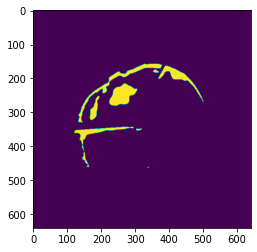

In [106]:
file_name = '../../example_input_pred.mat'
with h5py.File(file_name, 'r') as f:
    img = f['preds'][5]
    plt.imshow(img)

## Dataset Testing

In [40]:
from cloudseg.training.cloud_dataset import HDF5Dataset

In [41]:
dataset = HDF5Dataset("../../data/datasets/optimized_3_mini", "train", use_clear_sky=True)

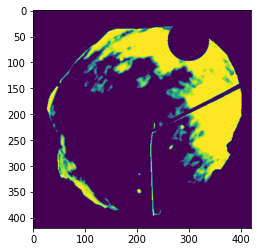

In [42]:
data = dataset[1]
plt.imshow(data["irc"].squeeze())

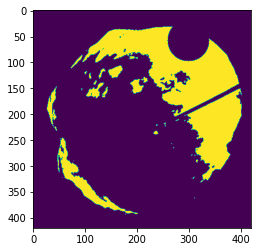

In [43]:
plt.imshow(data["label"].squeeze())

In [ ]:
plt.hist(dataset[0]["irc"].flatten())

In [31]:
dataset[0]["irc"][150,100]

0.0

In [32]:
dataset[0]

{'index': 0,
 'timestamp': '20180106130604',
 'irc': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'label': array([[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]])}

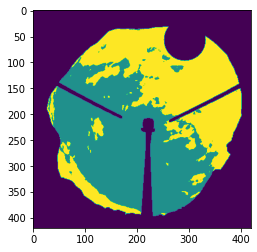

In [33]:
plt.imshow(dataset[0]["label"])

(array([80293.,     0.,     0.,     0.,     0., 52173.,     0.,     0.,
            0., 43934.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

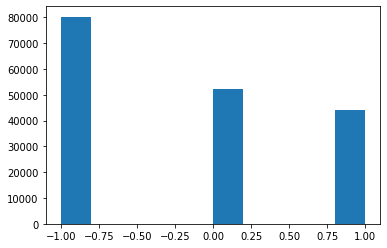

In [43]:
plt.hist(dataset[0]["label"].flatten())

<KeysViewHDF5 ['clear_sky', 'irc', 'selected_label', 'sun_mask', 'timestamp']>


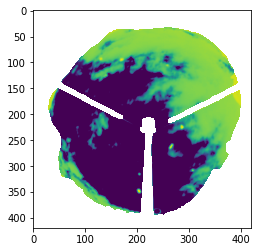

In [152]:
file_name = '../../data/datasets/optimized_3_mini/20180106.h5'
idx = 0
with h5py.File(file_name, 'r') as f:
    print(f.keys())
    plt.imshow(f["irc"][0])

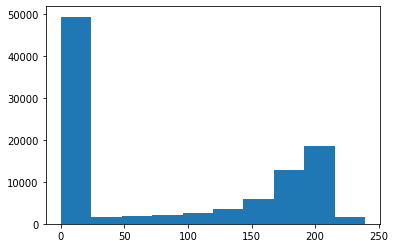

In [42]:
file_name = '../../data/datasets/optimized_3_mini/20180106.h5'
idx = 0
with h5py.File(file_name, 'r') as f:
    plt.hist(f["irc"][0].flatten())

In [108]:
dataset_4 = HDF5Dataset("../../data/datasets/optimized_4", "train", use_clear_sky=True)

20181031084204
80007


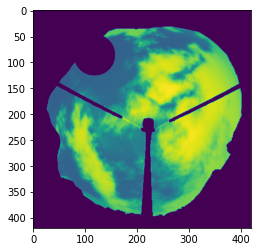

In [136]:
idx = 400
print(dataset_4[idx]["timestamp"])
print(len(np.where(dataset_4[idx]["irc"].flatten() == 0.0)[0]))
plt.imshow(dataset_4[idx]["irc"])

In [144]:
indices = []
for i in range(len(dataset_4)):
    if len(np.where(dataset_4[i]["irc"].flatten() == 0.0)[0]) > 90000:
        indices.append(i)

In [145]:
print(len(indices))

133


20180615151004
176400


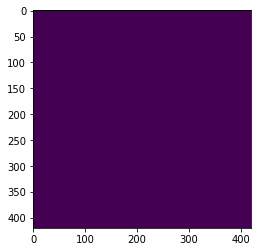

In [150]:
idx = indices[30]
print(dataset_4[idx]["timestamp"])
print(len(np.where(dataset_4[idx]["irc"].flatten() == 0.0)[0]))
plt.imshow(dataset_4[idx]["irc"])

In [151]:
for idx in indices:
    print(dataset_4[idx]["timestamp"])

20180115110204
20180115111204
20180115112204
20180115113203
20180115114204
20180115115203
20180115120203
20180115121204
20180115122203
20180115123204
20180115124203
20180115125203
20180115130204
20180115131204
20180115132203
20180608061004
20180608062004
20180809090604
20180615131004
20180615132004
20180615133003
20180615134004
20180615135004
20180615140003
20180615141004
20180615142004
20180615143004
20180615144004
20180615145004
20180615150004
20180615151004
20180615152004
20180615153004
20180615154004
20180615155004
20180615160004
20180615161003
20180615162003
20180615163004
20180505145103
20180505150104
20180716081704
20180716085703
20180716090703
20180107103604
20180107104604
20180107105603
20180107110604
20180107111603
20180107112604
20180107113603
20180107114604
20180107115604
20180107120604
20180107121604
20180107122604
20180107123603
20180107124604
20180107125603
20180107130603
20180107131604
20180107132604
20180107133603
20180107134604
20180107135603
20180111080403
2018011108

(array([81293., 10287.,  7484.,  5545.,  6634.,  9759., 19654., 28041.,
         7619.,    84.]),
 array([0.        , 0.07932888, 0.15865776, 0.23798665, 0.31731552,
        0.3966444 , 0.4759733 , 0.5553022 , 0.63463104, 0.71395993,
        0.7932888 ], dtype=float32),
 <BarContainer object of 10 artists>)

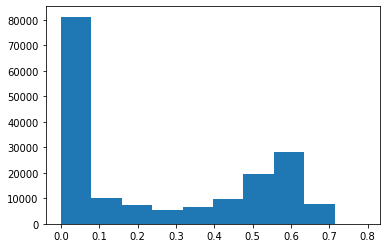

In [72]:
plt.hist(dataset_4[90]["irc"].flatten())

In [70]:
dataset_4[90]["irc"][350,350]

0.0

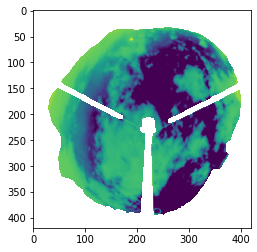

In [93]:
file_name = '../../data/datasets/optimized_4/20180107.h5'
idx = 0
with h5py.File(file_name, 'r') as f:
    plt.imshow(f["irc"][0])

In [171]:
from datetime import datetime, timedelta
import math
from cloudseg.utils.constants import TIMEZONE, TIMESTAMP_FORMAT

def convert_timestamp(day, timestamp):
    """
    Converts irccam timestamps in double format (e.g. 737653.55976907) to
    timestamps capped to the nearest second (e.g. 20190816132643)
    """
    seconds = round(24 * 60 * 60 * (timestamp - math.floor(timestamp)))
    seconds_delta = timedelta(0, seconds)
    day_timestamp = datetime.strptime(day, "%Y%m%d")
    return TIMEZONE.localize(day_timestamp + seconds_delta).strftime(TIMESTAMP_FORMAT)

In [182]:
file_name = '../../data/raw/davos/irccam/irccam_20180115_rad.mat'
with h5py.File(file_name, 'r') as f:
    print(convert_timestamp("20180115", f["TM"][0][702]))

20180115114204


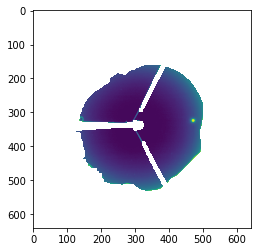

In [183]:
file_name = '../../data/raw/davos/irccam/irccam_20180115_rad.mat'
with h5py.File(file_name, 'r') as f:
    plt.imshow(f["BT"][702])

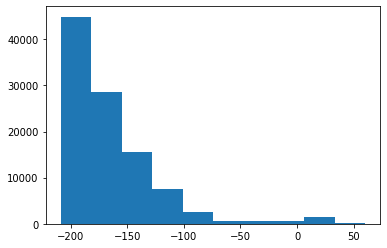

In [184]:
file_name = '../../data/raw/davos/irccam/irccam_20180115_rad.mat'
with h5py.File(file_name, 'r') as f:
    plt.hist(f["BT"][702].flatten())

In [192]:
hot_indices = []
for i in range(len(dataset_4)):
    if len(np.where(dataset_4[i]["irc"].flatten() == 1.0)[0]) > 10:
        hot_indices.append(i)

In [193]:
len(hot_indices)

203

In [194]:
len(indices)

133

In [195]:
len(dataset_4)

4828

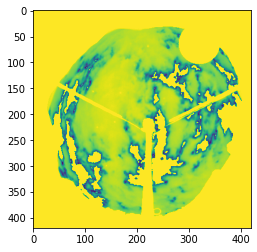

In [206]:
img = dataset_4[hot_indices[90]]["irc"]
img[img == 0.0] = 1.0
plt.imshow(img)

## Loss and metrics

In [208]:
import torch

In [216]:
preds = torch.tensor([[
    [
        [0.,1,0],
        [1,0,1],
        [0,1,0],
    ],
    [
        [1,1,1],
        [0,0,0],
        [1,0,1],
    ]
],
[
    [
        [0.,1,0],
        [1,0,1],
        [0,1,0],
    ],
    [
        [1,1,1],
        [0,0,0],
        [1,0,1],
    ]
]])
labels = torch.tensor([
    [
        [0,1,0],
        [1,0,1],
        [0,1,0],
    ],
    [
        [1,1,1],
        [0,0,0],
        [1,0,1],
    ]
])

In [232]:
torch.nn.CrossEntropyLoss(reduction="mean")(preds, labels)

tensor(0.7866)

In [233]:
preds.shape, labels.shape

(torch.Size([2, 2, 3, 3]), torch.Size([2, 3, 3]))

In [234]:
torch.nn.CrossEntropyLoss(reduction="mean")(preds.reshape((-1,2)), labels.flatten())

tensor(0.7866)

In [226]:
preds.reshape((-1,2)).shape

torch.Size([2, 18])

In [227]:
labels.flatten().shape

torch.Size([18])

## Validation data 

In [36]:
from cloudseg.training.cloud_dataset import HDF5Dataset
from cloudseg.training.transforms import get_transforms, get_validation_transforms
from argparse import Namespace

In [37]:
args = Namespace()
args.random_rotations=True
args.random_mask=True
transforms = get_transforms(args)
dataset = HDF5Dataset("../../data/datasets/optimized_3_mini", "train", use_clear_sky=True, transform=transforms)

In [38]:
args.val_rotation=True
args.val_random_mask = False
val_transforms = get_validation_transforms(args)
val_dataset = HDF5Dataset("../../data/datasets/optimized_3_mini", "val", use_clear_sky=True, transform=val_transforms)

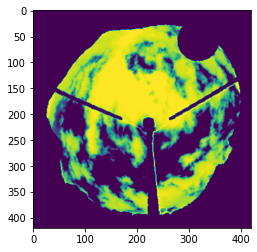

In [39]:
val_data= val_dataset[20]
plt.imshow(val_data['irc'].squeeze())

## Models with weighted loss

In [48]:
from cloudseg.training.cloud_dataset import HDF5Dataset
from cloudseg.training.transforms import get_transforms, get_validation_transforms
from argparse import Namespace
from cloudseg.inference.load_model import load_model

In [90]:
args = Namespace()
args.val_random_mask = False
args.val_rotation = False
transforms = get_validation_transforms(args)
test_data = HDF5Dataset("../../data/datasets/optimized_3", "test", use_clear_sky=True, use_sun_mask=False, transform=transforms)

In [64]:
model_2_0 = load_model("model_2_0")
model_2_0.eval()
model_1_0 = load_model("model_1_0")
model_1_0.eval()
model_0_5 = load_model("model_0_5")
model_0_5.eval()

Loading model model_2_0
Loading model model_1_0
Loading model model_0_5


CloudSegmentation(
  (model): DeepLab(
    (backbone): ResNet(
      (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): SynchronizedBatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): SynchronizedBatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): SynchronizedBatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): SynchronizedBatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, 

In [72]:
def predict(model, data):
    return model.model(data['irc'].unsqueeze(0)).squeeze().argmax(0).detach().numpy()

In [166]:
idx=0

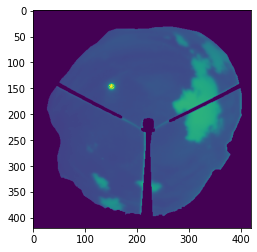

In [170]:
idx += 1
plt.imshow(test_data[idx]['irc'].squeeze())

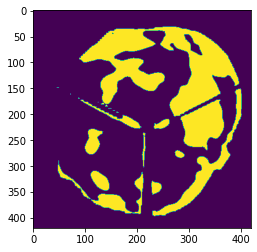

In [171]:
plt.imshow(predict(model_2_0, test_data[idx]))

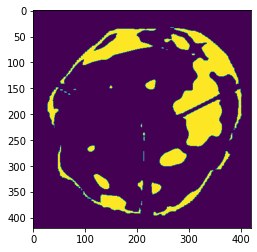

In [172]:
plt.imshow(predict(model_1_0, test_data[idx]))

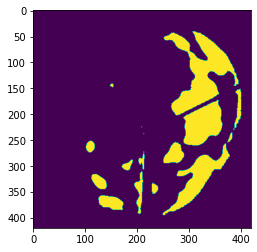

In [173]:
plt.imshow(predict(model_0_5, test_data[idx]))